## Arbol de desición

## Esteban triana aldana

## Importamos librerias

In [130]:
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.model_selection import train_test_split

from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn import tree
import seaborn as sns


## cargamos archivo csv

In [132]:
#cargamos el csv
ruta_archivo= ('winequality-red.csv')
df = pd.read_csv(ruta_archivo)


## analisis exploratorio

In [134]:
#visualizamos la base de datos
df.head(20)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
5,7.4,0.660,0.00,1.8,0.075,13.0,40.0,0.9978,3.51,0.56,9.4,5
6,7.9,0.600,0.06,1.6,0.069,15.0,59.0,0.9964,3.30,0.46,9.4,5
7,7.3,0.650,0.00,1.2,0.065,15.0,21.0,0.9946,3.39,0.47,10.0,7
8,7.8,0.580,0.02,2.0,0.073,9.0,18.0,0.9968,3.36,0.57,9.5,7
9,7.5,0.500,0.36,6.1,0.071,17.0,102.0,0.9978,3.35,0.80,10.5,5


In [136]:
df.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


In [138]:
df.shape
    

(1599, 12)

In [140]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


In [142]:
df.isna().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

## transformamos datos 

In [148]:
# valores en 0 
print(df['fixed acidity'].isin([0]).sum())
print(df['volatile acidity'].isin([0]).sum())
print(df['citric acid'].isin([0]).sum())
print(df['residual sugar'].isin([0]).sum())
print(df['chlorides'].isin([0]).sum())
print(df['free sulfur dioxide'].isin([0]).sum())
print(df['total sulfur dioxide'].isin([0]).sum())
print(df['density'].isin([0]).sum())
print(df['pH'].isin([0]).sum())
print(df['sulphates'].isin([0]).sum())
print(df['alcohol'].isin([0]).sum())
print(df['sulphates'].isin([0]).sum())

0
0
0
0
0
0
0
0
0
0
0
0


In [146]:
# rellenamos valores basador en la mediana
df['citric acid']=df['citric acid'].replace(0,df['citric acid'].median())

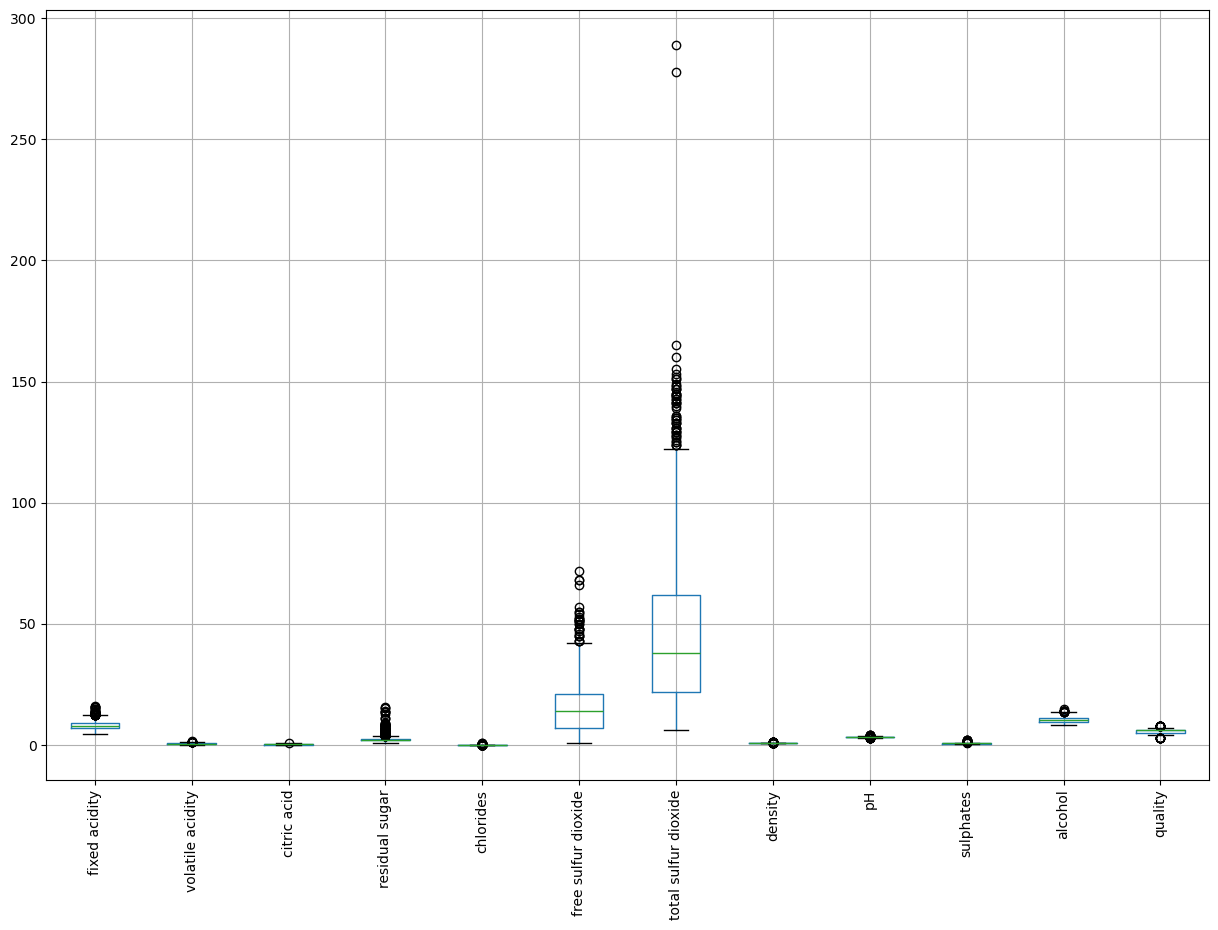

In [150]:
# verificamos datos atipicos
plt.figure(figsize=(15,10))
df.boxplot()
plt.xticks(rotation=90)
plt.show()

In [152]:
# borramos datos atipicos
Q1 = df['total sulfur dioxide'].quantile(0.25)
Q3 = df['total sulfur dioxide'].quantile(0.75)
IQR = Q3 - Q1
# Definimos los límites inferior y superior 
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR
# Mostramos los límites calculados
print(f'Límite inferior: {lower_bound}, Límite superior: {upper_bound}')
# Eliminamos datos atipicos 'total sulfur dioxide'
df_clean = df[(df['total sulfur dioxide'] >= lower_bound) & (df['total sulfur dioxide'] <= upper_bound)]
# Verificamos el tamaño del dataset 
print(f'Dimensiones del dataset después de eliminar outliers: {df_clean.shape}')

Límite inferior: -38.0, Límite superior: 122.0
Dimensiones del dataset después de eliminar outliers: (1544, 12)


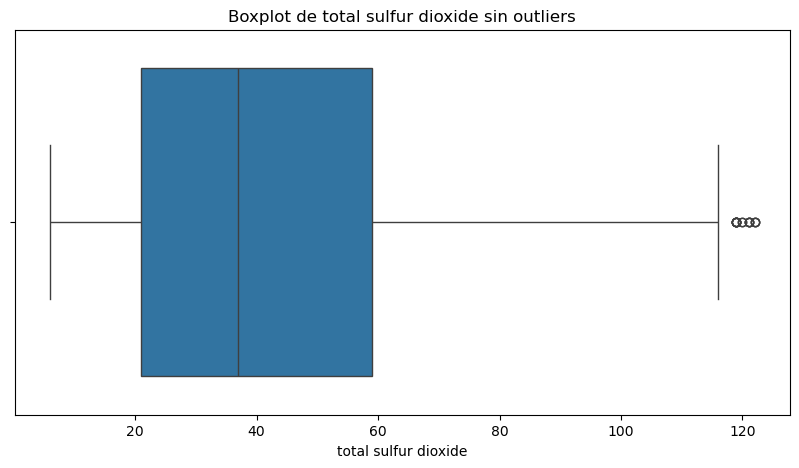

In [156]:
#rectificamos si se cambiaron los valores
plt.figure(figsize=(10,5))
sns.boxplot(x=df_clean['total sulfur dioxide'])
plt.title('Boxplot de total sulfur dioxide sin outliers')
plt.show()

## seleccion de caracteristicas importantes

In [158]:
# identificamos  (X) y (y)
X = df.drop('quality', axis=1)
y = df['quality']



## entrenamiento de modelo

In [164]:
# datos en entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=40)

from sklearn.tree import DecisionTreeClassifier

model = DecisionTreeClassifier()
model.fit(X_train, y_train)

DecisionTreeClassifier()

In [166]:
y_pred = model.predict(X_test)

## evaluacion de modelo

In [186]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report

# Calculamos precisión, recall, F1-score
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='weighted', zero_division=1)  
recall = recall_score(y_test, y_pred, average='weighted', zero_division=1)
f1 = f1_score(y_test, y_pred, average='weighted', zero_division=1)

# Mostramos resultados
print(f'Precisión (Accuracy): {accuracy:.2f}')
print(f'Precisión (Precision): {precision:.2f}')
print(f'Recall: {recall:.2f}')
print(f'F1-Score: {f1:.2f}')

Precisión (Accuracy): 0.63
Precisión (Precision): 0.64
Recall: 0.63
F1-Score: 0.63


## grafica arbol de desicion

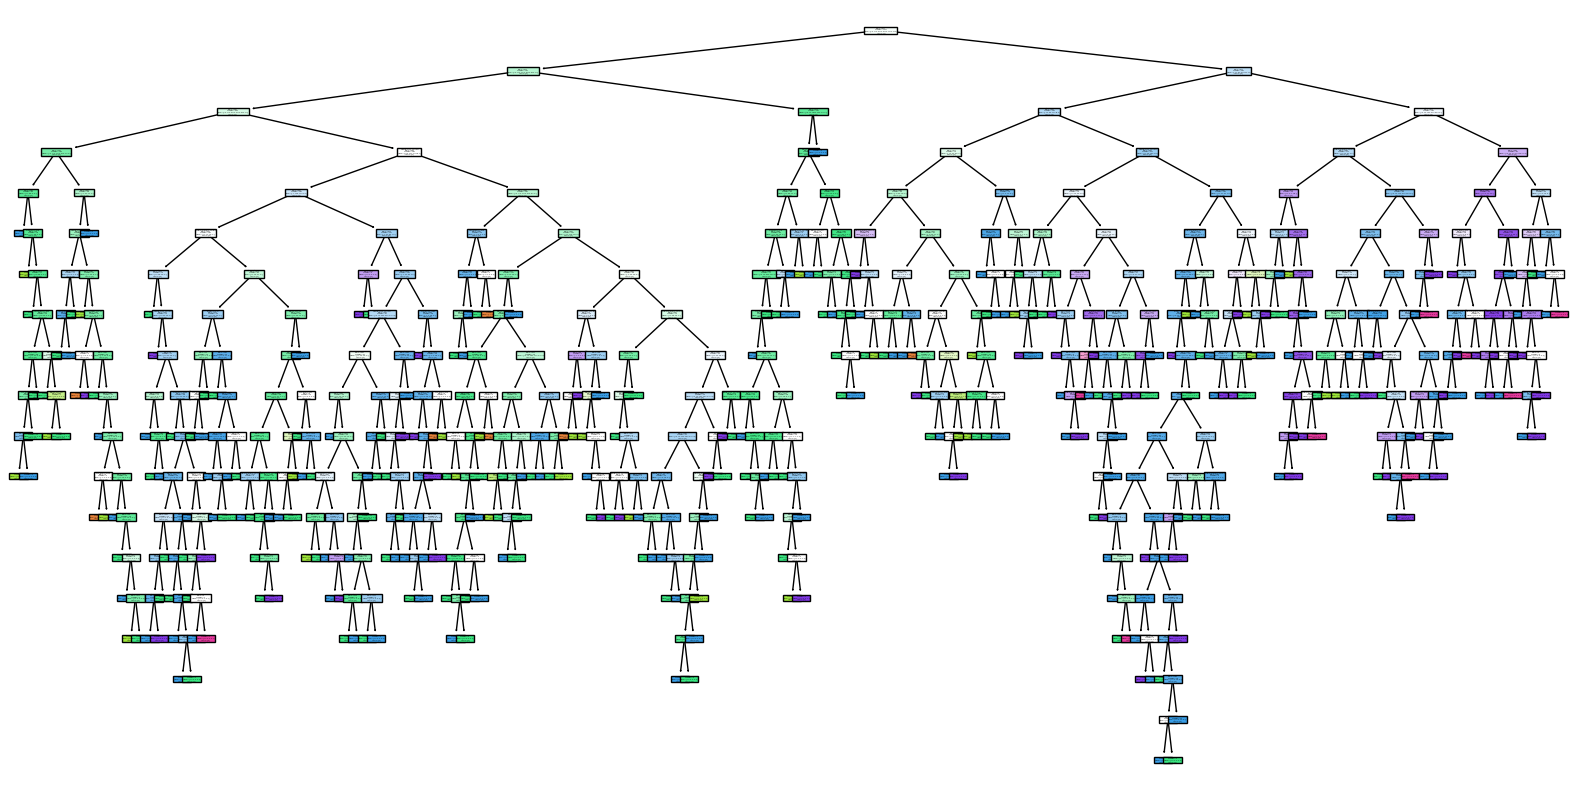

In [190]:
# Visualizamos el árbol de decisión
plt.figure(figsize=(20,10))
tree.plot_tree(model, feature_names=X.columns, class_names=True, filled=True)
plt.show()

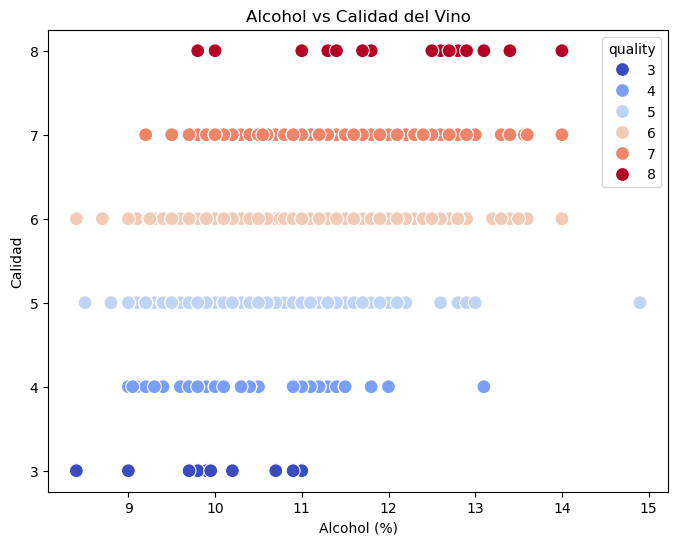

In [192]:
# Diagrama de dispersión entre alcohol y quality
plt.figure(figsize=(8,6))
sns.scatterplot(x='alcohol', y='quality', data=df_clean, hue='quality', palette='coolwarm', s=100)
plt.title('Alcohol vs Calidad del Vino')
plt.xlabel('Alcohol (%)')
plt.ylabel('Calidad')
plt.show()

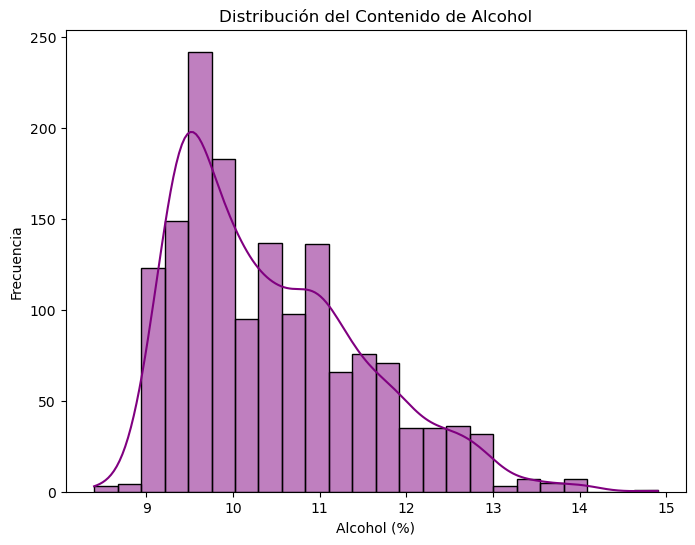

In [194]:
# Histograma de alcohol
plt.figure(figsize=(8,6))
sns.histplot(df_clean['alcohol'], kde=True, color='purple')
plt.title('Distribución del Contenido de Alcohol')
plt.xlabel('Alcohol (%)')
plt.ylabel('Frecuencia')
plt.show()

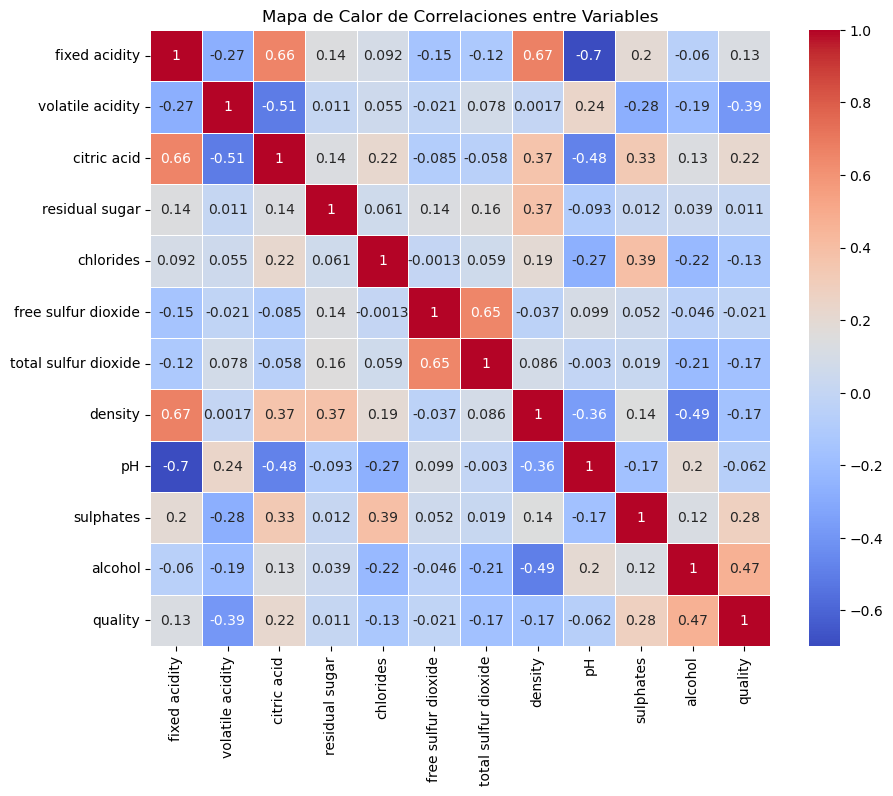

In [196]:
# Mapa de calor de correlación
plt.figure(figsize=(10,8))
correlation_matrix = df_clean.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Mapa de Calor de Correlaciones entre Variables')
plt.show()

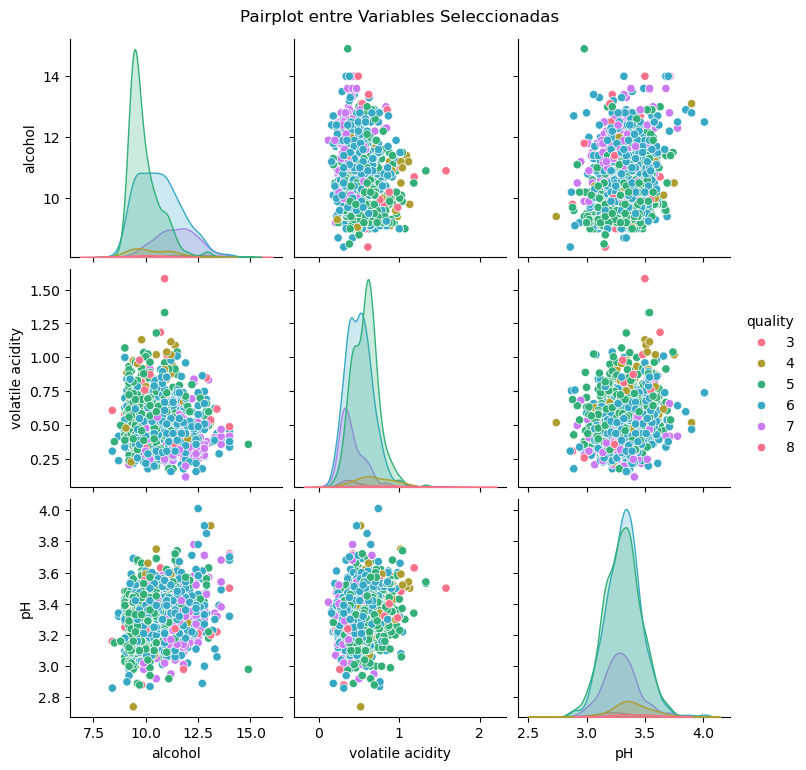

In [198]:
# Pairplot entre algunas variables clave
sns.pairplot(df_clean[['alcohol', 'volatile acidity', 'pH', 'quality']], hue='quality', palette='husl')
plt.suptitle('Pairplot entre Variables Seleccionadas', y=1.02)
plt.show()

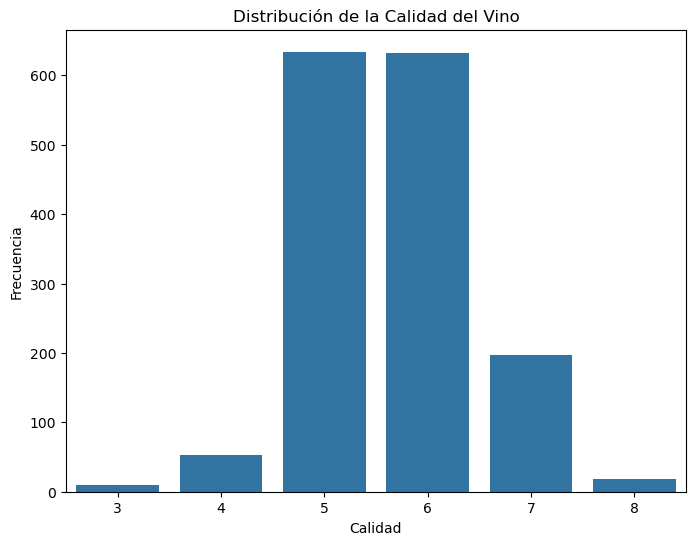

In [204]:
plt.figure(figsize=(8,6))
sns.countplot(x='quality', data=df_clean )
plt.title('Distribución de la Calidad del Vino')
plt.xlabel('Calidad')
plt.ylabel('Frecuencia')
plt.show()

## interpretacion de resultados

Alcohol vs Calidad : El gráfico muestra que no hay una relación directa entre el contenido de alcohol y la calidad del vino. Sin embargo, se observa que los vinos de mayor calidad tienden a tener niveles de alcohol un poco más elevados.

 a mayoría de los vinos en el conjunto de datos tienen un contenido de alcohol que varía entre 9% y 10,5%. Esto sugiere que los vinos con una calidad media predominan en el conjunto de datos.

Mapa de calor de correlaciones : Algunas variables muestran correlaciones interesantes. Por ejemplo, el dióxido de azufre libre y total tienen una fuerte variación, lo que indica que están relacionados en su impacto sobre el vino. Sin embargo, no parece haber una fuerte presión directa entre las variables químicas y la calidad.

 El pairplot revela algunas distribuciones interesantes entre variables como alcohol, pH, y volatile acidity. Los vinos de mejor calidad tienden a agruparse con ciertos valores de estas variables, pero no hay una tendencia clara.

el grafico de distribucion de calidad de vino indica que el conjunto de datos tiene una mayor proporción de vinos de calidad media, mientras que los vinos de calidad muy baja (3 o 4) y muy alta (7 o 8) son menos frecuentes.